# Image denoising

- cv.fastNlMeansDenoising() - works with a single grayscale images
- cv.fastNlMeansDenoisingColored() - works with a color image.
- cv.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

Common arguments are:
- h : parameter deciding filter strength. Higher h value removes noise better, but removes details of image also. (10 is ok)
- hForColorComponents : same as h, but for color images only. (normally same as h)
- templateWindowSize : should be odd. (recommended 7)
- searchWindowSize : should be odd. (recommended 21)

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
img_path = os.path.join('..', '..', 'pics', 'pic.jpg')
img = cv.imread(img_path)
gray =cv.cvtColor(img, cv.COLOR_BGR2GRAY)

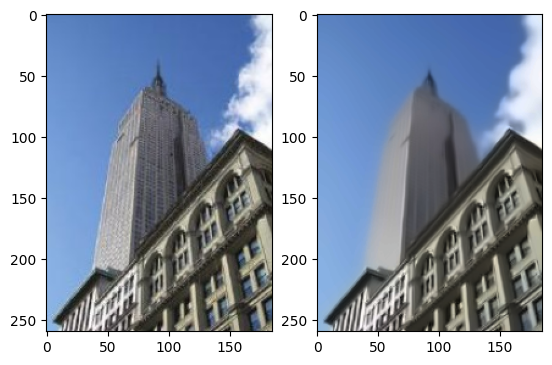

In [6]:
img_path = os.path.join('..', '..', 'pics', 'pic.jpg')
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dst = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)
 
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)

Apply for video

In [ ]:
cap = cv.VideoCapture('vtest.avi')
 
# create a list of first 5 frames
img = [cap.read()[1] for i in range(5)]
 
# convert all to grayscale
gray = [cv.cvtColor(i, cv.COLOR_BGR2GRAY) for i in img]
 
# convert all to float64
gray = [np.float64(i) for i in gray]
 
# create a noise of variance 25
noise = np.random.randn(*gray[1].shape)*10
 
# Add this noise to images
noisy = [i+noise for i in gray]
 
# Convert back to uint8
noisy = [np.uint8(np.clip(i,0,255)) for i in noisy]
 
# Denoise 3rd frame considering all the 5 frames
dst = cv.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7, 35)
 
plt.subplot(131),plt.imshow(gray[2],'gray')
plt.subplot(132),plt.imshow(noisy[2],'gray')
plt.subplot(133),plt.imshow(dst,'gray')